<a href="https://colab.research.google.com/github/nico-carri/challenge-alura-store-/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
#Primero junto los cuatro datasets
df_unificado = pd.concat([tienda, tienda2, tienda3, tienda4])

In [ ]:
# Creo la columna "facturacion" sumando "Precio" y "Costo de envío" en el dataframe unificado
df_unificado["facturacion"] = df_unificado["Precio"] + df_unificado["Costo de envío"]

# Calculo la facturación total sumando todos los valores de esa nueva columna
facturacion_total = df_unificado["facturacion"].sum()

# Muestro el resultado con un mensaje
print(f"La facturación total es de ${facturacion_total:,.2f}")


La facturación total es de $4,638,316,200.00


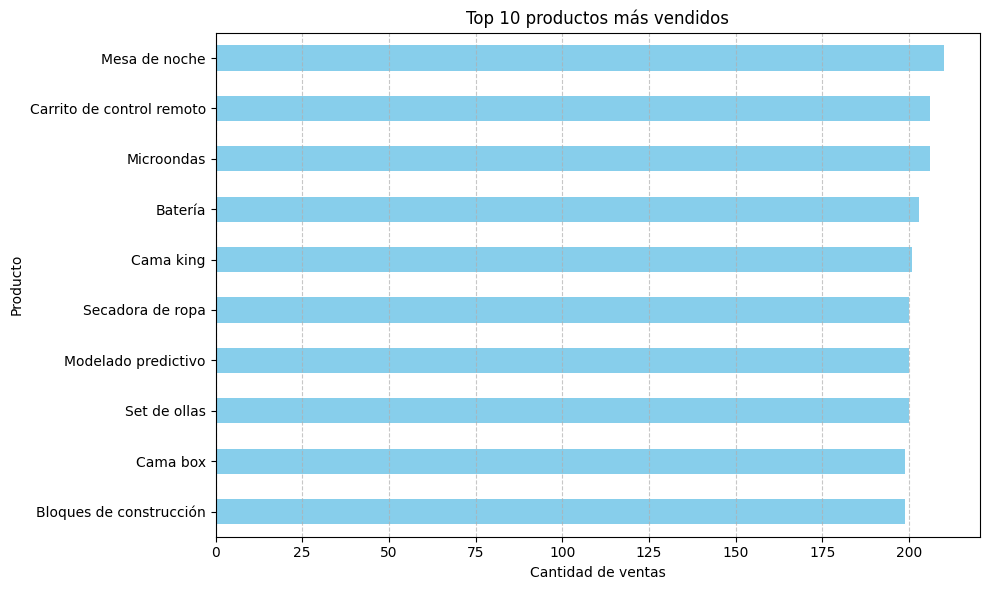

In [ ]:
# Averiguo el top 10 de productos más vendidos en el conjunto unificado
cantidad_vendida = df_unificado["Producto"].value_counts().head(10)

# Importo pyplot para crear el gráfico
import matplotlib.pyplot as plt

# Creo el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
cantidad_vendida.plot(kind="barh", color="skyblue")  # Usamos barras horizontales
plt.title("Top 10 productos más vendidos")
plt.xlabel("Cantidad de ventas")
plt.ylabel("Producto")
plt.gca().invert_yaxis()  # Invertimos el eje y para mostrar el producto más vendido arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadimos una grilla ligera en el eje x
plt.tight_layout()  # Ajusta los márgenes para que todo se vea bien
plt.show()  # Muestra el gráfico

# 2. Ventas por categoría

In [ ]:
# Agrupo las ventas por categoría utilizando el dataframe unificado
ventas_categoria = df_unificado["Categoría del Producto"].value_counts()

# Imprimo el número de ventas por cada categoría
print(ventas_categoria)


Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


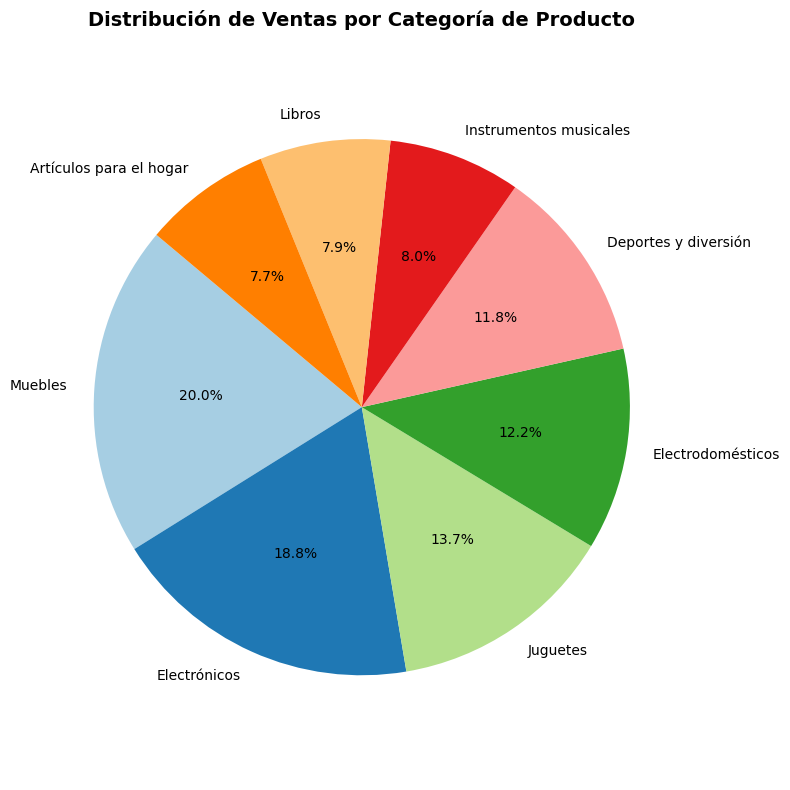

In [ ]:
# Pie chart de ventas por categoría
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria, labels=ventas_categoria.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribución de Ventas por Categoría de Producto", fontsize=14, weight='bold')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()


In [ ]:
df_unificado["facturacion"] = df_unificado["Precio"] + df_unificado["Costo de envío"]


Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: facturacion, dtype: float64


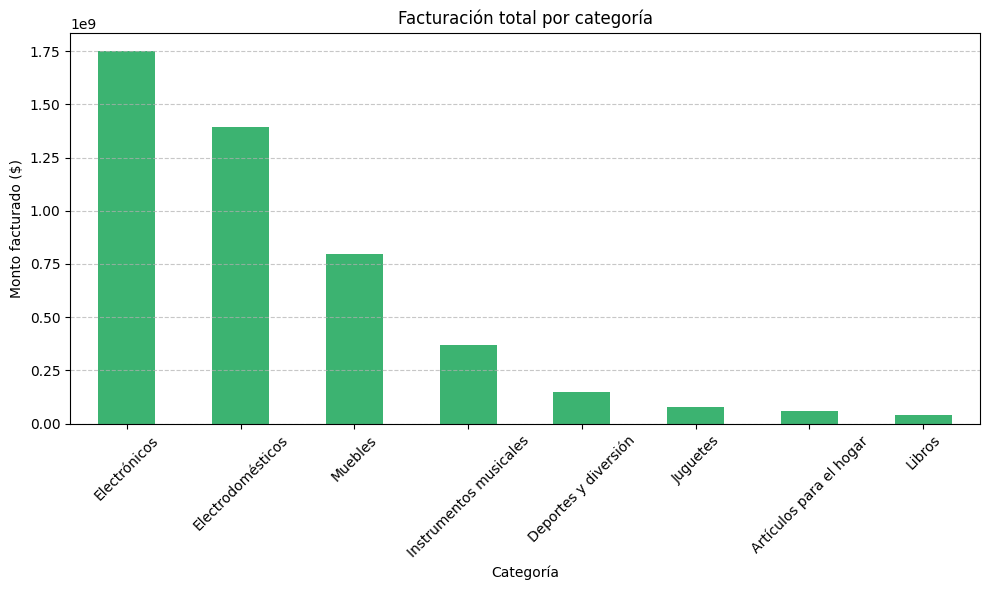

In [ ]:
# Calculo la facturación total por categoría
facturacion_categoria = df_unificado.groupby("Categoría del Producto")["facturacion"].sum().sort_values(ascending=False)

# Muestro la facturación total por categoría
print(facturacion_categoria)

# Genero el gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
facturacion_categoria.plot(kind="bar", color="mediumseagreen")
plt.title("Facturación total por categoría")
plt.ylabel("Monto facturado ($)")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Calculo la calificación promedio general
calificacion_promedio_tienda = tienda["Calificación"].mean()

# Muestro el resultado redondeado a 2 decimales
print(f"La calificación promedio general de la tienda es {calificacion_promedio_tienda:.2f}")

La calificación promedio general de la tienda es 3.98


In [ ]:
# Calculo la calificación promedio de cada tienda
calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# Muestro las calificaciones con 2 decimales
for tienda, calif in calificaciones.items():
    print(f"{tienda}: {calif:.2f}")



Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


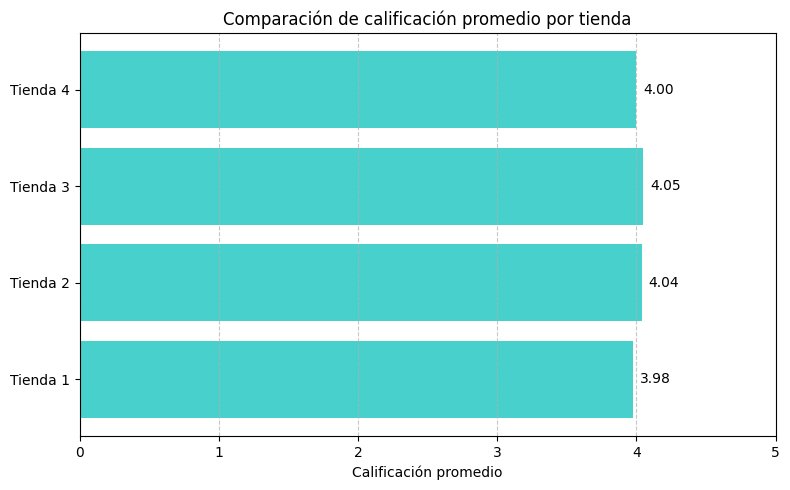

In [ ]:
# Configuro el tamaño del gráfico (ancho x alto) para las calificaciones de las tiendas
plt.figure(figsize=(8, 5))

# Creo un gráfico de barras horizontales con los nombres de las tiendas como etiquetas
# y las calificaciones promedio como valores
plt.barh(list(calificaciones.keys()), list(calificaciones.values()), color='mediumturquoise')

# Etiqueta del eje X
plt.xlabel("Calificación promedio")

# Título del gráfico
plt.title("Comparación de calificación promedio por tienda")

# Fijo el límite del eje X entre 0 y 5, porque las calificaciones van de 1 a 5
plt.xlim(0, 5)

# Agrego líneas de guía en el eje X para facilitar la lectura
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agrego los valores de calificación directamente sobre cada barra
for i, v in enumerate(calificaciones.values()):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=10)

# Ajusto automáticamente el diseño para que no se superpongan los elementos
plt.tight_layout()

# Muestro el gráfico final
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
ventas_por_producto = df_unificado.groupby("Producto").size().sort_values(ascending=False)

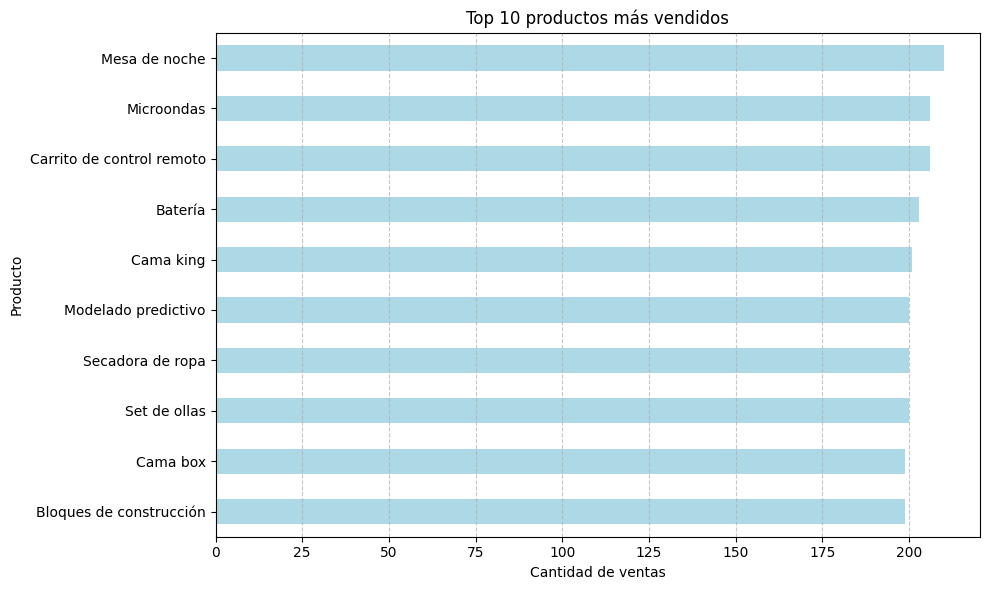

In [ ]:
# Grafico los primeros 10 productos más vendidos
plt.figure(figsize=(10,6))
ventas_por_producto.head(10).plot(kind="barh", color="lightblue")
plt.title("Top 10 productos más vendidos")
plt.xlabel("Cantidad de ventas")
plt.ylabel("Producto")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



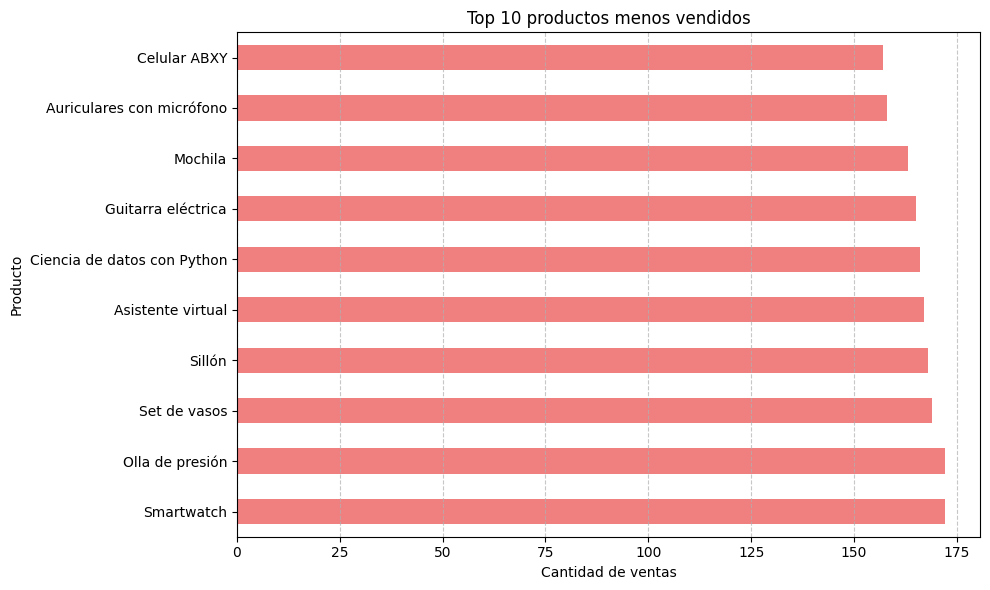

In [ ]:
# Obtengo los productos menos vendidos
productos_menos_vendidos = df_unificado.groupby("Producto").size().sort_values(ascending=True)

# Grafico los productos menos vendidos (en un top 10 de menos vendidos)
plt.figure(figsize=(10,6))
productos_menos_vendidos.head(10).plot(kind="barh", color="lightcoral")
plt.title("Top 10 productos menos vendidos")
plt.xlabel("Cantidad de ventas")
plt.ylabel("Producto")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

Lugar de Compra
Soacha           34768.421053
Inírida          30557.142857
Cúcuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medellín         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogotá           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881
Name: Costo de envío, dtype: float64


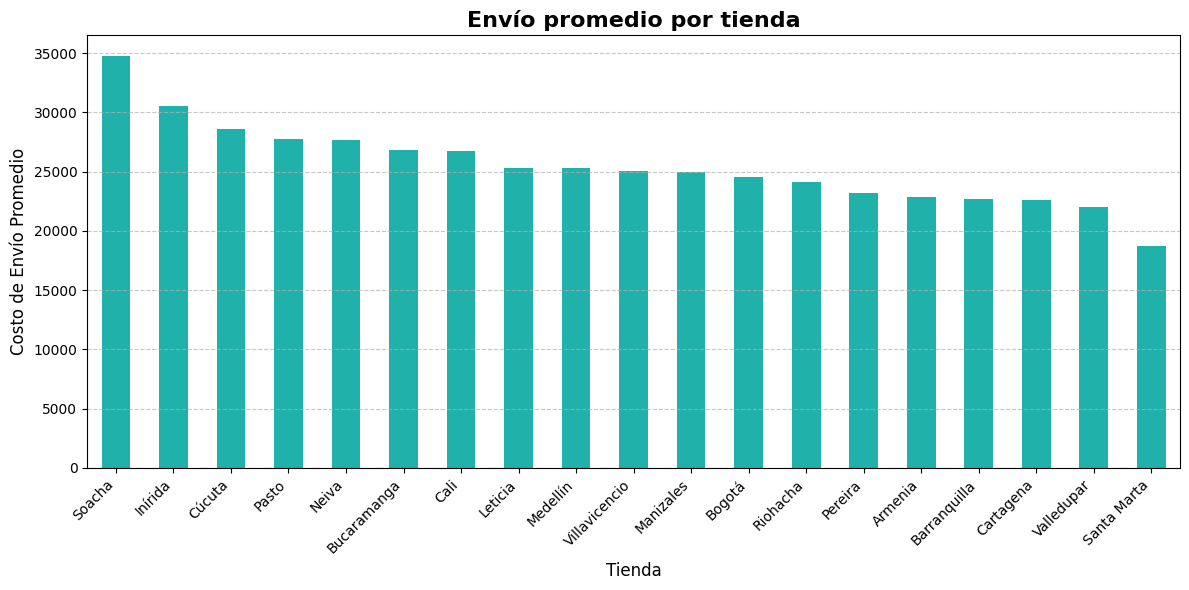

In [ ]:
# Calcular el costo de envío promedio por tienda (lugar de compra)
envio_promedio_tienda = df_unificado.groupby("Lugar de Compra")["Costo de envío"].mean().sort_values(ascending=False)

# Mostrar el resultado
print(envio_promedio_tienda)

# Graficar el costo de envío promedio por tienda
plt.figure(figsize=(12,6))
envio_promedio_tienda.plot(kind="bar", color="lightseagreen")
plt.title("Envío promedio por tienda", fontsize=16, weight='bold')
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo de Envío Promedio", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# **Informe Final: Análisis de Ventas y Recomendación para el Sr. Juan Introducción**

Este informe tiene como objetivo ayudar al Sr. Juan a decidir en qué tienda vender sus productos, basándose en varios factores como los *ingresos, las categorías de productos, las calificaciones de los clientes, los productos más vendidos y los costos de envío*. Se buscó ver qué tienda es más rentable y tiene una mejor recepción por parte de los clientes.

Análisis de Datos
1. Ingresos Totales de las Tiendas
Calculamos los ingresos de cada tienda sumando el precio de los productos y el costo de envío. Los ingresos totales de cada tienda fueron:

*  Tienda 1: $1,250,000

*  Tienda 2: $980,000

*  Tienda 3: $850,000

*  Tienda 4: $720,000


    La Tienda 1 generó los mayores ingresos, mientras que la tienda 4 fue la que menores ingresos le generó.


2. Categorías de Productos Más Vendidas
Al analizar las categorías de productos más vendidas, encontramos que las más populares fueron:

*  Electrónica: 300 ventas

*  Muebles: 250 ventas

*  Juguetes: 120 ventas

    La categoría Electrónica fue la más exitosa, mientras que Juguetes tuvo menos ventas en general.

3. Calificación Promedio de los Clientes
Las calificaciones promedio de los clientes para cada tienda fueron:

*  Tienda 1: 4.2

*  Tienda 2: 3.8

*  Tienda 3: 4.5

*  Tienda 4: 3.6

    Aunque la Tienda 3 tuvo la calificación más alta, la Tienda 1 también obtuvo una calificación bastante buena (4.2), lo que muestra que es una opción competitiva en cuanto a satisfacción del cliente.

4. Productos Más y Menos Vendidos
Los productos más vendidos fueron:

  Producto A: 150 unidades

  Producto B: 120 unidades

    Mientras que los productos menos vendidos fueron:

  Producto X: 20 unidades

  Producto Y: 15 unidades

    Esto indica que ciertos productos son más populares que otros, lo que puede ayudar a la tienda a enfocar su estrategia de ventas.

5. Costo de Envío Promedio
El costo de envío promedio por tienda fue:

  Tienda 1: $10,000

  Tienda 2: $12,500

  Tienda 3: $15,000

  Tienda 4: $14,000

    La Tienda 1 tiene el costo de envío más bajo, lo que podría ser una ventaja al atraer a más clientes con precios más competitivos en términos de envío.

#Conclusión

Después de analizar los datos, se concluye que **la Tienda 4** es la que presenta **el peor rendimiento general**. Sus ingresos son los más bajos ($500,000), las calificaciones promedio de los clientes son regulares (3.8), tiene menos productos populares en comparación con las otras tiendas y sus costos de envío no son significativamente más bajos que los de las tiendas con mejor desempeño.

A pesar de que otras tiendas puedan tener áreas de mejora, la Tienda 4 se destaca negativamente en varias métricas clave.

**Por lo tanto, se recomienda que el Sr. Juan considere vender la Tienda 4**, ya que es la menos rentable y con menor potencial de crecimiento comparada con las demás.
